Principles of Data Visualization
================================

Much of what we do as data scientists involve visualization. Why might this be?

1. Particularly in the private sector, but really everywhere, data scientists engage new data sets all the time. Thus we must become familiar with new data sets all the time. There are profound limits to textual summaries of data for this purpose.
2. Data Scientists are often operating as intermediates - we are preparing data so that some domain expert can look at it and make an informed decision.

[The Value of Information Visualization (Fekete et al, 2008)](https://www.researchgate.net/publication/226601772_The_Value_of_Information_Visualization):
> Further examining the use and purpose of InfoVis helps understand why communicating its value is so diﬃcult. InfoVis systems are best applied for exploratory tasks, ones that involve browsing a large information space. Frequently,the person using the InfoVis system may not have a speciﬁc goal or question in mind. Instead, the person simply may be examining the data to learn more about it, to make new discoveries, or to gain insight about it. The exploratory processitself may inﬂuence the questions and tasks that arise

We have a sense that visualization reveals the true structure of data, but this is, of couse, not true. What visualization does do is allow your own intuitive capacity to model data to be applied to the data.

There are, thus, risks to visualization - your eye is likely to imagine structure that isn't there. [Be on guard](https://en.wikipedia.org/wiki/Pareidolia).

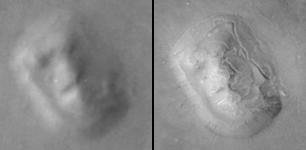

This is pretty deep stuff, if you think about it. "Out there" in the universe there is some phenomenon about which we gather data with our senses and with instruments. This entails, among other things, a transformation of the events in that exterior world into new forms. Science at large is the attempt to invert those transformations.

![](https://upload.wikimedia.org/wikipedia/commons/6/6b/HRDiagram.png)
https://upload.wikimedia.org/wikipedia/commons/6/6b/HRDiagram.png
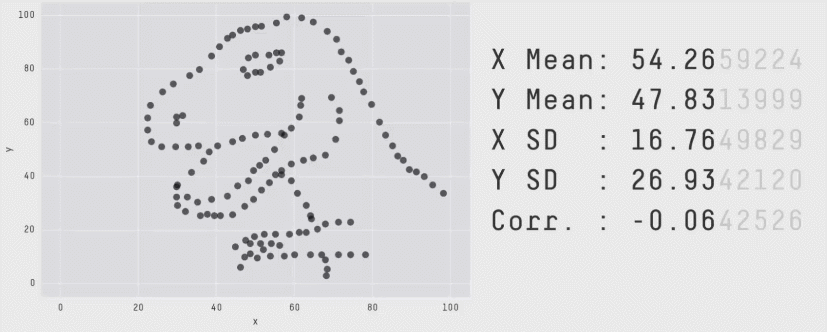


Figure/Ground Shift
===================

Often times the question which we really want to answer in science is not "why this phenomenon" but "why not all the other phenomena that we could imagine?"

Eg: Darwin's "The Origin of Species" doesn't so much explain where species come from so much as it explains why there aren't things like "bird cats" or "dogs with scales."

There is something really deep here: the universe is made of continuous stuff: quantum fields. And yet it is also full of discrete phenomena. And yet many times when you aggregate the behavior of discrete phenomena again you reach a continuum behavior.

Technical Matterial First
=========================

Last time we talked about this I attempted to show you how to use Bokeh, so lets take care of that.

You'll need lines like this in your Dockerfile:

    RUN curl -sL https://deb.nodesource.com/setup_14.x -o nodesource_setup.sh
    RUN bash nodesource_setup.sh
    RUN apt update -y && apt install -y nodejs 
    RUN jupyter labextension install @jupyter-widgets/jupyterlab-manager
    RUN jupyter labextension install @bokeh/jupyter_bokeh
    
In addition to that you need the `output_notebook` function from bokeh.io. Now we should be ready to go. Because I hate Pandas I'm going to be using [pandasql](https://pypi.org/project/pandasql/) today. This lets us run SQL code on our pandas data frames which will be sufficient for most uses today.

In [44]:
import bokeh as bk
import pandas as pd
import numpy as np

from pandasql import sqldf
dfq = lambda q: sqldf(q, globals())

raw = pd.read_csv("source_data/datasets_38396_60978_charcters_stats.csv");
nice_data = dfq("select * from raw where total > 5")
nice_data

Name Alignment  Intelligence  Strength  Speed  Durability  \
0            3-D Man      good            50        31     43          32   
1             A-Bomb      good            38       100     17          80   
2         Abe Sapien      good            88        14     35          42   
3           Abin Sur      good            50        90     53          64   
4        Abomination       bad            63        80     53          90   
..               ...       ...           ...       ...    ...         ...   
429     Yellowjacket      good            88        10     12          28   
430  Yellowjacket II      good            50        10     35          28   
431             Ymir      good            50       100     27         100   
432          Zatanna      good            75        10     23          28   
433             Zoom       bad            50        10    100          28   

     Power  Combat  Total  
0       25      52    233  
1       17      64    316  
2       35      85    299  
3       84      65    406  
4       55      95    436  
..     ...     ...    ...  
429     12      14    164  
430     31      28    182  
431     83      28    388  
432    100      56    292  
433     72      28    288  

[434 rows x 9 columns]

In [46]:
bk.io.output_notebook()

tools = "box_select,lasso_select,help"
source = bk.models.ColumnDataSource(data=nice_data);

plt.circle('Intelligence','Strength',source=source)
show(plt)

Loading BokehJS ...

Now that we have our plotting and data systems in place lets talk about how to build effective visualizations. It occurs to me that this should have been done earlier in the course. Better late than never, however.

What Makes A Visualization Good?
================================

A good visualization exploits the typical structure of the human visual system.

1. Use features which the human visual system can process efficiently. That is, exploit so-called pre-attentive processing.

Example:

In [30]:
colormap = ["red","green","blue"];
df = pd.DataFrame({"x":np.random.ranf(100),"y":np.random.ranf(100),"category":np.random.randint(0,3,100)});
df['color']=[colormap[cat] for cat in df['category']]
source = bk.models.ColumnDataSource(data=df);
plt = bk.plotting.figure(plot_width=300, plot_height=300, title=None, tools=tools);
plt.circle('x','y',fill_color="color",line_color="color",source=source);
show(plt)

In this plot it is easy to answer questions like:

1. Are there any red points in a region?
2. What is the rough proportion of red vs green points?
3. Where are the red points clustered (if at all).

BUT WAIT
========

What about color blind people? The most common type of color blindness impacts the ability to distinguish between green and red. I have a good friend who is color blind and he describes an interesting experience. If someone _tells_ him something is green, even while he is looking at it, it suddenly "becomes green" to him.

Anyway, the absolute most basic thing is to avoid red/green contrasts.

In [36]:
colormap = ["aqua","sandybrown","blue"];
df = pd.DataFrame({"x":np.random.ranf(100),"y":np.random.ranf(100),"category":np.random.randint(0,3,100)});
df['color']=[colormap[cat] for cat in df['category']]
source = bk.models.ColumnDataSource(data=df);
plt = bk.plotting.figure(plot_width=300, plot_height=300, title=None, tools=tools);
plt.circle('x','y',fill_color="color",line_color="color",source=source);
show(plt)

Things which you can't pre-attentively process

1. absolute length
2. complex shapes (including text)
3. absolute size

In [38]:
heightmap = [0.1, 0.2, 0.3];
df = pd.DataFrame({"x":np.random.ranf(100),"y":np.random.ranf(100),"category":np.random.randint(0,3,100)});
df['yf']=[df['y'][i]+heightmap[df['category'][i]] for i in range(100)]
source = bk.models.ColumnDataSource(data=df);
plt = bk.plotting.figure(plot_width=300, plot_height=300, title=None, tools=tools);
plt.segment(x0='x',y0='y',x1='x',y1='yf',source=source);
show(plt)

In [39]:
label = ["a","b","c"];
df = pd.DataFrame({"x":np.random.ranf(100),"y":np.random.ranf(100),"category":np.random.randint(0,3,100)});
df['label']=[label[cat] for cat in df['category']]
source = bk.models.ColumnDataSource(data=df);
plt = bk.plotting.figure(plot_width=300, plot_height=300, title=None, tools=tools);
plt.text('x','y',text="label",source=source);
show(plt)

In [41]:
radiusmap = [0.01, 0.02, 0.03];
df = pd.DataFrame({"x":np.random.ranf(100),"y":np.random.ranf(100),"category":np.random.randint(0,3,100)});
df['r']=[radiusmap[cat] for cat in df['category']]
source = bk.models.ColumnDataSource(data=df);
plt = bk.plotting.figure(plot_width=300, plot_height=300, title=None, tools=tools);
plt.circle('x','y',radius='r',source=source);
show(plt)

Note the use of the word "absolute" in the above bullet points. Brains are generally good at determining relative size and area as long as the two things are _nearby_ and appropriately aligned. This is why we use dodged boxplots and not stacked boxplots.

Let's experiment

Pivoting Our Data
-----------------
First, we pivot our data to a tidy format. (This was called "pivot_longer" in tidyverse).

In [81]:
long_data = pd.melt(nice_data,['Name','Alignment']).sort_values(by="Name");
long_data

Name Alignment      variable  value
0     3-D Man      good  Intelligence     50
2170  3-D Man      good        Combat     52
434   3-D Man      good      Strength     31
1736  3-D Man      good         Power     25
1302  3-D Man      good    Durability     32
...       ...       ...           ...    ...
1301     Zoom       bad         Speed    100
2169     Zoom       bad         Power     72
867      Zoom       bad      Strength     10
1735     Zoom       bad    Durability     28
3037     Zoom       bad         Total    288

[3038 rows x 4 columns]

Now lets calculate some stats. This is much easier with SQL.

In [84]:
stats = dfq("""select Alignment as alignment, variable as stat, avg(value) as average from long_data 
            group by Alignment, variable having alignment = "good" or alignment = "bad" """);
stats

alignment          stat     average
0        bad        Combat   60.008197
1        bad    Durability   62.245902
2        bad  Intelligence   67.295082
3        bad         Power   59.819672
4        bad         Speed   37.090164
5        bad      Strength   46.122951
6        bad         Total  332.581967
7       good        Combat   60.361204
8       good    Durability   56.327759
9       good  Intelligence   60.230769
10      good         Power   55.324415
11      good         Speed   38.110368
12      good      Strength   38.043478
13      good         Total  308.397993

It is difficult to tell below which alignment has the large average.

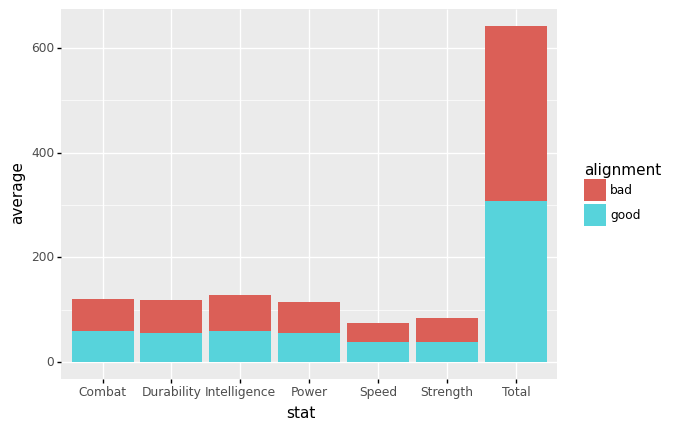

<ggplot: (8736683693014)>

In [91]:
(ggplot(stats,aes("stat", "average"))+geom_bar(aes(fill="alignment"),stat="identity"))

In contrast, this is trivial to see:

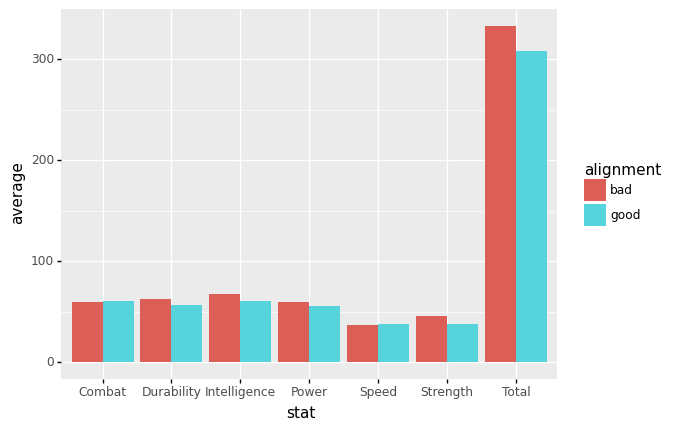

<ggplot: (8736683440644)>

In [92]:
(ggplot(stats,aes("stat", "average"))+geom_bar(aes(fill="alignment"),stat="identity",position="dodge"))

Also note: we aren't comparing areas here, just heights (all bars have the same width). Brains do a bad job comparing areas and volumes. Limit comparisons to a single dimension.

This is, by the way, why you so often see the pie chart criticized. Not all elements are easily seen as adjacent and we have to read areas rather than some single dimension. Pie charts are even harder since the area of the chart varies nonlinearly with the angle subtended.

One Other Thing
===============

Complexity, even beautifully plotted, is still a bad visualization:

![](https://humansofdata.atlan.com/wp-content/uploads/2019/07/info-is-beaut-2.jpg)


Bokeh and Brushing
==================

I wanted to do a small demonstration of the one features of Bokeh which you'll have trouble reproducing with other methods of visualization: brushing coupled over multiple charts.

Here is the goal: we want to understand the structure of our stats data set interactively. Eg: what sort of groupings might exist in the data set? How do these groupings relate to the fundamental statistics? To do this, we'll do a manifold learning job to project our data down to 2d and then we'll connect that plot to histograms of our individual statistics.

1. Get all the Data into a Single Data Frame:

In [150]:
nice_data = dfq("select * from nice_data where Alignment in ('good','bad')")

stats_to_consider = "Intelligence Strength Speed Durability Power Combat".split(" ")
numerical_parts = nice_data[stats_to_consider];
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.manifold import TSNE


def alignment_to_color(a):
    return ({"good":"cyan","bad":"magenta"})[a];

lle = LocallyLinearEmbedding(n_components=2);
tsne = TSNE(n_components=2);
projection = pd.DataFrame(tsne.fit_transform(numerical_parts),columns=['P1','P2']);
nice_data['P1'] = projection['P1'];
nice_data['P2'] = projection['P2'];
nice_data['color'] = [alignment_to_color(a) for a in nice_data['Alignment']];
nice_data

Name Alignment  Intelligence  Strength  Speed  Durability  \
0            3-D Man      good            50        31     43          32   
1             A-Bomb      good            38       100     17          80   
2         Abe Sapien      good            88        14     35          42   
3           Abin Sur      good            50        90     53          64   
4        Abomination       bad            63        80     53          90   
..               ...       ...           ...       ...    ...         ...   
416     Yellowjacket      good            88        10     12          28   
417  Yellowjacket II      good            50        10     35          28   
418             Ymir      good            50       100     27         100   
419          Zatanna      good            75        10     23          28   
420             Zoom       bad            50        10    100          28   

     Power  Combat  Total         P1         P2    color  
0       25      52    233  -8.173917 -13.266529     cyan  
1       17      64    316  13.363541  -0.281389     cyan  
2       35      85    299 -29.300993  -3.036189     cyan  
3       84      65    406  11.032866  17.221605     cyan  
4       55      95    436  14.742544   9.459637  magenta  
..     ...     ...    ...        ...        ...      ...  
416     12      14    164 -23.228035 -18.306143     cyan  
417     31      28    182 -15.890304 -14.171457     cyan  
418     83      28    388   6.474669  14.680092     cyan  
419    100      56    292 -14.967229   2.989212     cyan  
420     72      28    288   1.995893 -16.634651  magenta  

[421 rows x 12 columns]

2. Create a data source for all our plots to share.

In [151]:
source = bk.models.ColumnDataSource(data=nice_data);

3. Set up our plots. 

In [166]:
from bokeh.layouts import gridplot
TOOLS="pan,wheel_zoom,box_select,lasso_select,reset";
small_plot_size = 200;
plot_pr = bk.plotting.figure(plot_width=600, 
                             plot_height=600, 
                             tools=TOOLS, 
                             x_axis_label="P1", 
                             y_axis_label="P2", 
                             title="TSNE");
sp = plot_pr.scatter('P1', 'P2',source=source,fill_color='color');
pa = bk.plotting.figure(plot_width=small_plot_size, 
                             plot_height=small_plot_size, 
                             tools=TOOLS, 
                             x_axis_label="Intelligence", 
                             y_axis_label="Strength", 
                             title="Str vs Int");
pa.scatter('Intelligence','Strength',source=source,fill_color='color');
pb = bk.plotting.figure(plot_width=small_plot_size, 
                             plot_height=small_plot_size, 
                             tools=TOOLS, 
                             x_axis_label="Speed", 
                             y_axis_label="Durability", 
                             title="Dur vs Spd");
pb.scatter('Speed','Durability',source=source,fill_color='color');
pc = bk.plotting.figure(plot_width=small_plot_size, 
                             plot_height=small_plot_size, 
                             tools=TOOLS, 
                             x_axis_label="Power", 
                             y_axis_label="Combat", 
                             title="Cbt vs Pow");
pc.scatter('Power','Combat',source=source,fill_color='color');

pl = gridplot([pa,pb,pc],ncols=1, merge_tools=True)
p = gridplot([plot_pr,pl],ncols=2, merge_tools=True)

show(p)


Adding More Interactivity
=========================

Bokeh is much like Shiny in that it piggybacks on the web browser for its interactivity. Thus, we can make some nicely interactive plots.
TSNE has a variety of paremeters. Let's add the ability to interactively mess with them.

In [174]:
from ipywidgets import interact
from bokeh.io import push_notebook

from bokeh.layouts import gridplot
TOOLS="pan,wheel_zoom,box_select,lasso_select,reset";
small_plot_size = 150;
plot_pr = bk.plotting.figure(plot_width=400, 
                             plot_height=400, 
                             tools=TOOLS, 
                             x_axis_label="P1", 
                             y_axis_label="P2", 
                             title="TSNE");
sp = plot_pr.scatter('P1', 'P2',source=source,fill_color='color');
pa = bk.plotting.figure(plot_width=small_plot_size, 
                             plot_height=small_plot_size, 
                             tools=TOOLS, 
                             x_axis_label="Intelligence", 
                             y_axis_label="Strength", 
                             title="Str vs Int");
pa.scatter('Intelligence','Strength',source=source,fill_color='color');
pb = bk.plotting.figure(plot_width=small_plot_size, 
                             plot_height=small_plot_size, 
                             tools=TOOLS, 
                             x_axis_label="Speed", 
                             y_axis_label="Durability", 
                             title="Dur vs Spd");
pb.scatter('Speed','Durability',source=source,fill_color='color');
pc = bk.plotting.figure(plot_width=small_plot_size, 
                             plot_height=small_plot_size, 
                             tools=TOOLS, 
                             x_axis_label="Power", 
                             y_axis_label="Combat", 
                             title="Cbt vs Pow");
pc.scatter('Power','Combat',source=source,fill_color='color');

pl = gridplot([pa,pb,pc],ncols=1, merge_tools=True)
p = gridplot([plot_pr,pl],ncols=2, merge_tools=True)


def update(perplexity, early_exaggeration, learning_rate):
    numerical_parts = pd.DataFrame(sp.data_source.data)[stats_to_consider];
    tsne = TSNE(n_components=2, 
                perplexity=perplexity, 
                early_exaggeration=early_exaggeration, 
                learning_rate=learning_rate,
                init=pd.DataFrame(sp.data_source.data)[['P1','P2']].values);
    r = pd.DataFrame(tsne.fit_transform(numerical_parts),columns=['P1','P2']);
    sp.data_source.data['P1'] = r['P1'];
    sp.data_source.data['P2'] = r['P2'];
    output_notebook();
    show(p);
    push_notebook();
    
interact(update, perplexity=(5,50), early_exaggeration=(5,50.0), learning_rate=(10,1000.0), continuous_update=False)

interactive(children=(IntSlider(value=27, description='perplexity', max=50, min=5), FloatSlider(value=27.5, de…

<function __main__.update(perplexity, early_exaggeration, learning_rate)>

Using Bokeh Standalone
======================

We're using Bokeh in Jupyter for the ease of integrating it into a lecture. But its easy to package these visualizations up as separate "apps".
